# CHALLENGE: ANALYZING TEXT ABOUT DATA SCIENCE

## Goal

In this challenge, we are aim to understand the concept of text mining and visualize the result.

In [1]:
url = 'https://en.wikipedia.org/wiki/Machine_learning'

### Step 1: Getting the Data

In [3]:
import requests

text = requests.get(url).content.decode("utf-8")

### Step 2: Transforming the Data

in this step, you are to convert the data to the most suitable format for processing. In this we need to download the html source code from the page and convert it into plain text.

In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ''
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ['script', 'style']:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ['script', 'style']:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' ' +data.replace('[ edit ]', '')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

    

 Machine learning - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 History 2 Relationships to other fields Toggle Relationships to other fields subsection 2.1 Artificial intelligence 2.2 Data compression 2.3 Data mining 2.4 Generalization 2.5 Statistics 2.6 Statistical physics 3 Theory 4 Approaches Toggle Approaches subsection 4.1 Supervised learning 4.2 Unsupervised learning 4.3 Semi-supervised learning 4.4 Reinforcement learning 4.5 Dimensionality reduction 4.6 Other types 4.6.1 Self-learning 4.6.2 Feature learning 4.6.3 Sparse dictionary learning 4.6.4 Anomaly detection 4.6.5 Robot lear

### Step 3: Getting Insights

In this step, we are to turn the data to some form so that we can draw insight.

In [5]:
import sys

!{sys.executable} -m pip install nlp_rake

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------- ----------------------------- 262.1/981.5 kB ? eta -:--:--
     ---------- ----------------------------- 262.1/981.5 kB ? eta -:--:--
     ---------- ----------------------------- 262.1/981.5 kB ? eta -:--:--
     ------------------- ---------------- 524.3/981.5 kB 399.6 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/981.5 kB 399.6 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/981.5 kB 399.6 kB/s eta 0:00:02
     ---------------------------- ------- 786.4/981.5 kB 381.3 kB/s eta 0:00:01
     ------------------------------------ 981.5/981.5 kB 374.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.

In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2, min_freq=3, min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('data set', 4.0),
 ('polynomial time', 4.0),
 ('main article', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('decision tree', 4.0),
 ('gaussian processes', 4.0),
 ('algorithmic bias', 4.0),
 ('language corpora', 4.0),
 ('prentice hall', 4.0),
 ('mit press', 4.0),
 ('wayback machine', 3.981651376146789),
 ('artificial neuron', 3.9743589743589745),
 ('statistical learning', 3.963636363636364),
 ('deep learning', 3.963636363636364),
 ('feature learning', 3.963636363636364),
 ('reinforcement learning', 3.963636363636364),
 ('machine learning', 3.9452877397831525),
 ('artificial intelligence', 3.907692307692308),
 ('bayesian networks', 3.888888888888889),
 ('supervised learning', 3.8867132867132868),
 ('speech recognition', 3.857142857142857),
 ('neural networks', 3.857142857142857),
 ('pattern recognition', 3.857142857142857),
 ('statistical physics', 3.833333333333333),
 ('unsupervised learning', 3.8097902097902097),
 ('international con

### Step 4: Visualizing the Result

visualization helps us to understand and draw meaningful insight from data

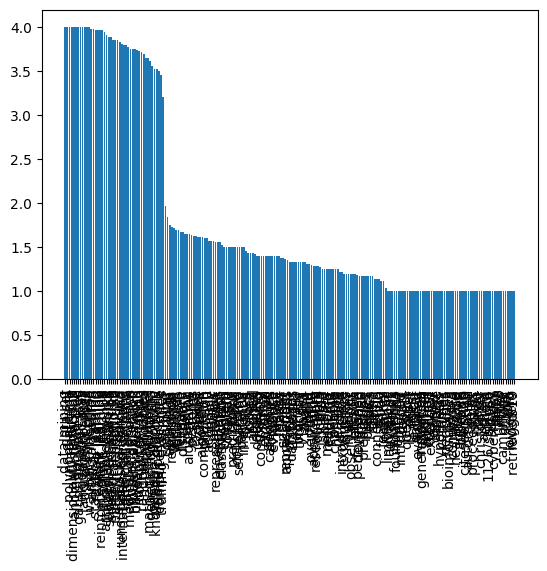

In [7]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)), v)
    plt.xticks(range(len(k)), k, rotation='vertical')
    plt.show()

plot(res)

In [8]:
!{sys.executable} -m pip install wordcloud

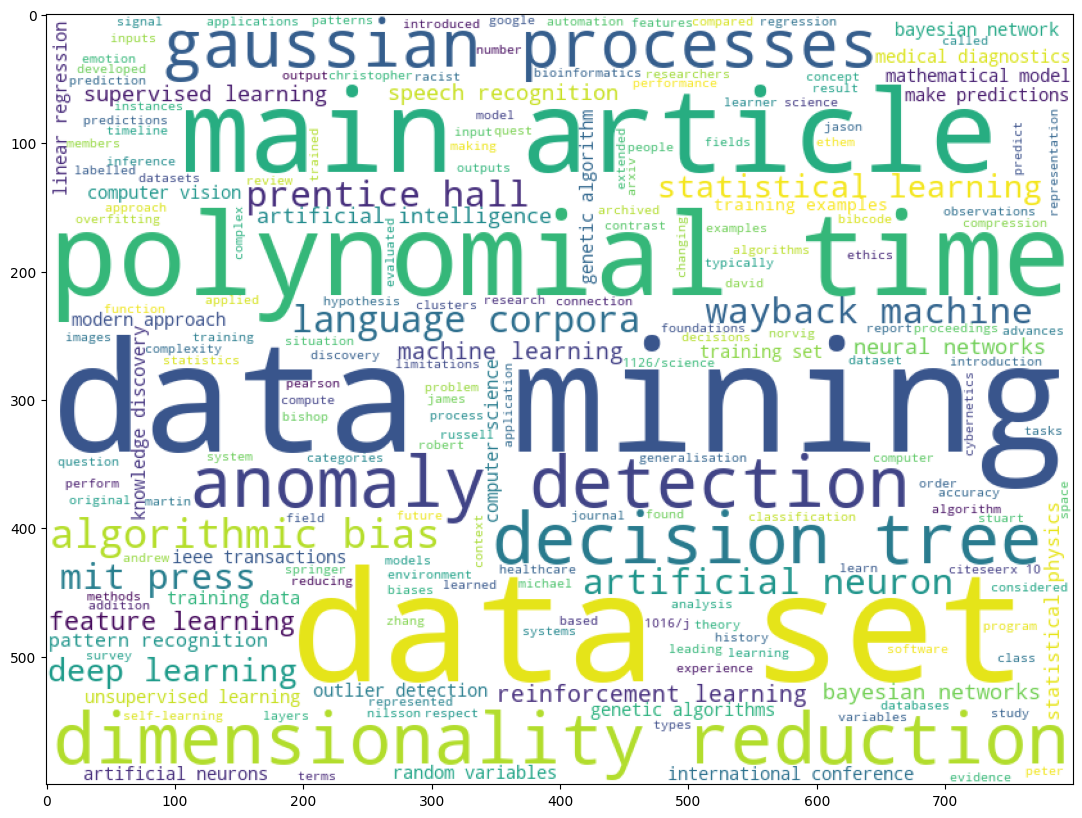

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud(background_color='white', width=800, height=600)
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_frequencies({ k:v for k, v in res }))


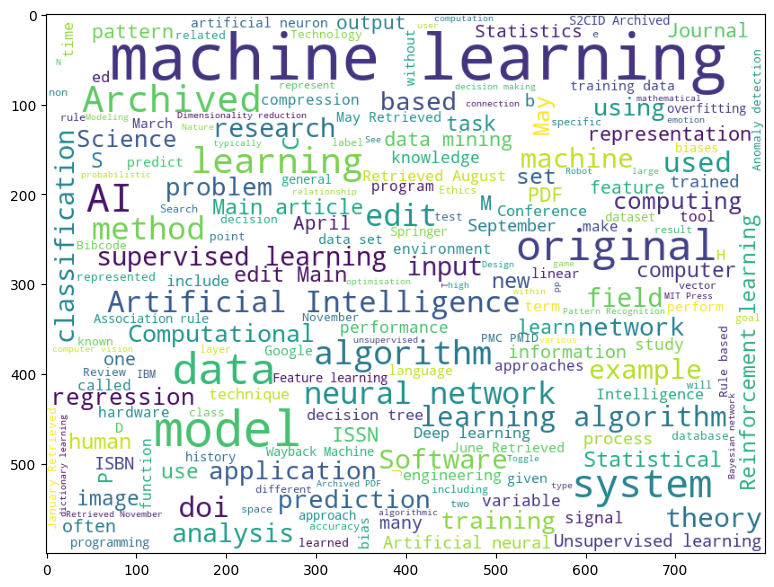

In [11]:
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate(text))

wc.generate(text).to_file('wordcloud.png')

# THE END